In [ ]:
import os

In [ ]:
import matplotlib
if matplotlib.__version__ != "3.1.3":
    !pip uninstall -y matplotlib
    !pip install matplotlib==3.1.3
    os.kill(os.getpid(), 9)

In [ ]:
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  os.kill(os.getpid(), 9)

In [ ]:
import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json
import pickle
import scipy.sparse

random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

In [ ]:
working_directory = '/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling'
json_path = "%s/allnikereviews.json" % working_directory
#https://tmtoolkit.readthedocs.io/en/latest/text_corpora.html


In [ ]:
from time import sleep
json_file = json.load(open(json_path, 'r'))

for a_review in json_file:
  the_review = json_file[a_review]
  # print(the_review)
  # sleep(5)

In [ ]:
the_review

{'asin': 'B00L5K86LO',
 'helpful': [0, 0],
 'overall': 5.0,
 'reviewText': 'Love it !',
 'reviewTime': '07 20, 2014',
 'reviewerID': 'A1KBC812A7RSY9',
 'reviewerName': 'B',
 'summary': 'So CUTE',
 'unixReviewTime': 1405814400}

In [ ]:
corpus = Corpus()
for i, a_review in enumerate(json_file):
  the_review = json_file[a_review]
  corpus.add_doc(str(i), the_review['reviewText'])

In [ ]:
print(len(corpus))

21570


In [ ]:
corpus['91']

'These watch has bought for its girlfriend. Such accessory not to find in Russia, Alas Nike does not trade. When she has got and parcel of land, they seemed very small and on baby hand. But each woman paid attention to her hand and I caughted the glances of the mans on her hand. The Product perfect, reliable, stylish. The Price funny, quality excellent. Will Suit for any young girl, which concerns with the sport and active rest. You may be calm for her watch and beauty.Alex'

(array([1.9776e+04, 1.4690e+03, 2.0900e+02, 6.6000e+01, 2.3000e+01,
        1.5000e+01, 6.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 5.0010e+02, 9.9920e+02, 1.4983e+03, 1.9974e+03,
        2.4965e+03, 2.9956e+03, 3.4947e+03, 3.9938e+03, 4.4929e+03,
        4.9920e+03]),
 <a list of 10 Patch objects>)

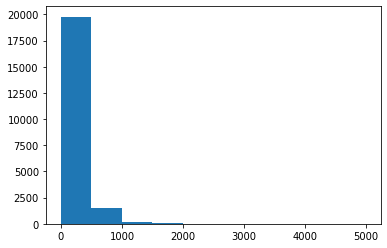

In [ ]:
import matplotlib

matplotlib.pyplot.hist(corpus.doc_lengths.values())

We will also now generate two DTMs. Don't remember what a document term matrix is? Go back to the conceptual lecture and refresh!

In [ ]:
#https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus, language='en')
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


<TMPreproc [21570 documents / en]>

In [ ]:
corpus['91']

'These watch has bought for its girlfriend. Such accessory not to find in Russia, Alas Nike does not trade. When she has got and parcel of land, they seemed very small and on baby hand. But each woman paid attention to her hand and I caughted the glances of the mans on her hand. The Product perfect, reliable, stylish. The Price funny, quality excellent. Will Suit for any young girl, which concerns with the sport and active rest. You may be calm for her watch and beauty.Alex'

In [ ]:
preproc.tokens['91']

['these',
 'watch',
 'have',
 'buy',
 'for',
 'its',
 'girlfriend',
 '',
 'such',
 'accessory',
 'not',
 'to',
 'find',
 'in',
 'russia',
 '',
 'alas',
 'nike',
 'do',
 'not',
 'trade',
 '',
 'when',
 'she',
 'have',
 'get',
 'and',
 'parcel',
 'of',
 'land',
 '',
 'they',
 'seem',
 'very',
 'small',
 'and',
 'on',
 'baby',
 'hand',
 '',
 'but',
 'each',
 'woman',
 'pay',
 'attention',
 'to',
 'her',
 'hand',
 'and',
 'i',
 'caughte',
 'the',
 'glance',
 'of',
 'the',
 'man',
 'on',
 'her',
 'hand',
 '',
 'the',
 'product',
 'perfect',
 '',
 'reliable',
 '',
 'stylish',
 '',
 'the',
 'price',
 'funny',
 '',
 'quality',
 'excellent',
 '',
 'will',
 'suit',
 'for',
 'any',
 'young',
 'girl',
 '',
 'which',
 'concern',
 'with',
 'the',
 'sport',
 'and',
 'active',
 'rest',
 '',
 'you',
 'may',
 'be',
 'calm',
 'for',
 'her',
 'watch',
 'and',
 'beauty',
 '',
 'alex']

In [ ]:
preproc.vocabulary_size

19202

In [ ]:
preproc.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,0,0,the,the,DET,True
1,0,1,colour,colour,NOUN,True
2,0,2,i,i,PRON,True
3,0,3,receive,receive,VERB,True
4,0,4,be,be,AUX,True
...,...,...,...,...,...,...
58,9999,58,this,this,DET,True
59,9999,59,purchase,purchase,NOUN,True
60,9999,60,be,be,AUX,True
61,9999,61,a,a+,DET,False


**Another** copy of `preproc` will apply more aggressive cleaning and hence will result in a smaller vocabulary size:

In [ ]:
preproc_smaller = preproc.copy() 
preproc_smaller.filter_for_pos('N', 'V', 'ADJ')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

19202
202


In [ ]:
preproc_smaller.tokens_datatable

,doc,position,token,lemma,pos,whitespace
0,0,0,receive,receive,VERB,True
1,0,1,blue,blue,ADJ,True
2,0,2,show,show,VERB,True
3,0,3,change,change,VERB,True
4,0,4,get,get,VERB,True
...,...,...,...,...,...,...
5,9999,5,find,find,VERB,True
6,9999,6,good,good,ADJ,True
7,9999,7,ship,ship,VERB,True
8,9999,8,quickly,quickly,ADV,True


In [ ]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['these', 'watch', 'have', 'buy', 'for', 'its', 'girlfriend', '', 'such', 'accessory', 'not', 'to', 'find', 'in', 'russia', '', 'alas', 'nike', 'do', 'not', 'trade', '', 'when', 'she', 'have', 'get', 'and', 'parcel', 'of', 'land', '', 'they', 'seem', 'very', 'small', 'and', 'on', 'baby', 'hand', '', 'but', 'each', 'woman', 'pay', 'attention', 'to', 'her', 'hand', 'and', 'i', 'caughte', 'the', 'glance', 'of', 'the', 'man', 'on', 'her', 'hand', '', 'the', 'product', 'perfect', '', 'reliable', '', 'stylish', '', 'the', 'price', 'funny', '', 'quality', 'excellent', '', 'will', 'suit', 'for', 'any', 'young', 'girl', '', 'which', 'concern', 'with', 'the', 'sport', 'and', 'active', 'rest', '', 'you', 'may', 'be', 'calm', 'for', 'her', 'watch', 'and', 'beauty', '', 'alex']
['buy', 'find', 'get', 'seem', 'small', 'pay', 'perfect', 'stylish', 'excellent', 'may']
['very', 'cute', 'and', 'be', 'really', 'practical', '', 'fit', 'well', 'on', 'small', 'wrist', 'which', 'be', 'my', 'case', '', 'i', '

We will create the document labels, vocabulary arrays and DTMs for both versions now:

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [ ]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary) 

In [ ]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<21570x19202 sparse matrix of type '<class 'numpy.int32'>'
 	with 743562 stored elements in Compressed Sparse Row format>,
 <21570x202 sparse matrix of type '<class 'numpy.int32'>'
 	with 179630 stored elements in Compressed Sparse Row format>)

In [ ]:
pickle.dump(doc_labels, open('%s/doc_labels.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm.npz' % working_directory, dtm_sm)
scipy.sparse.save_npz('%s/big_dtm.npz' % working_directory, dtm_bg)

pickle.dump(vocab_bg, open('%s/big_vocab.p' % working_directory, 'wb'))
pickle.dump(vocab_sm, open('%s/small_vocab.p' % working_directory, 'wb'))

pickle.dump(corpus, open('%s/corpus.p' % working_directory, 'wb') )